In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
import os
import cv2
import numpy as np
path = "D:\\dataset for lab programs\\TB_Chest_Radiography_Database"
classes = {'Normal': 0, 'Tuberculosis': 1}
def preprocess_images(path, classes):
    x ,y =[],[]
    for key in classes:
        pth = os.path.join(path, key)
        for i in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, i), 0)
            img = cv2.resize(img, (200, 200))
            img = cv2.normalize(img, None, 0, 1, cv2.NORM_MINMAX)
            x.append(img.flatten())
            y.append(classes[key])
    return np.array(x), np.array(y)

x, y = preprocess_images(path, classes)

In [3]:
class_counts = pd.Series(y).value_counts()
print("Class Distribution:")
print(class_counts)

Class Distribution:
0    3500
1     700
Name: count, dtype: int64


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)


In [5]:
from sklearn.model_selection import train_test_split

# Split data into training, validation, and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)  

# Reshape the data to match the input shape expected by the model
x_train = x_train.reshape(-1, 200, 200, 1)
x_val = x_val.reshape(-1, 200, 200, 1)
x_test = x_test.reshape(-1, 200, 200, 1)

# Apply data augmentation to the training set
train_generator = data_generator.flow(x_train, y_train, batch_size=32)
test_generator=data_generator.flow(x_test,y_test,batch_size=32)
validation_generator = data_generator.flow(x_val, y_val)


In [ ]:
print("Training data shape:", x_train.shape)
print("Validation data shape:", x_val.shape)
print("Testing data shape:", x_test.shape)


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from keras.models import Model

# Define the custom CNN architecture
model = Sequential()

# Input layer
model.add(Input(shape=(200, 200, 1)))

# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))

# Fully connected layer 1
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fully connected layer 2
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 200, 200, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 200, 200, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 100, 100, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100, 100, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 50, 50, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 25, 25, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 80000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    20,480,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,575,105 (78.49 MB)

 Trainable params: 20,574,145 (78.48 MB)

 Non-trainable params: 960 (3.75 KB)

In [8]:
x_train.shape



(2688, 200, 200, 1)

In [9]:
y_train.shape

(2688,)

In [10]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history=model.fit(train_generator ,epochs=5,validation_data=(x_val,y_val),callbacks=[early_stopping],verbose=1)

Epoch 1/5


c:\Users\JOSHWIN ISAC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


84/84 ━━━━━━━━━━━━━━━━━━━━ 60s 668ms/step - accuracy: 0.6321 - loss: 0.8212 - val_accuracy: 0.8348 - val_loss: 4.4443
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 54s 637ms/step - accuracy: 0.8138 - loss: 0.4459 - val_accuracy: 0.8348 - val_loss: 5.8649
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 54s 639ms/step - accuracy: 0.8355 - loss: 0.4015 - val_accuracy: 0.8393 - val_loss: 0.6457
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8446 - loss: 0.3795 - val_accuracy: 0.6458 - val_loss: 1.0155
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.8589 - loss: 0.3516 - val_accuracy: 0.1741 - val_loss: 13.4709


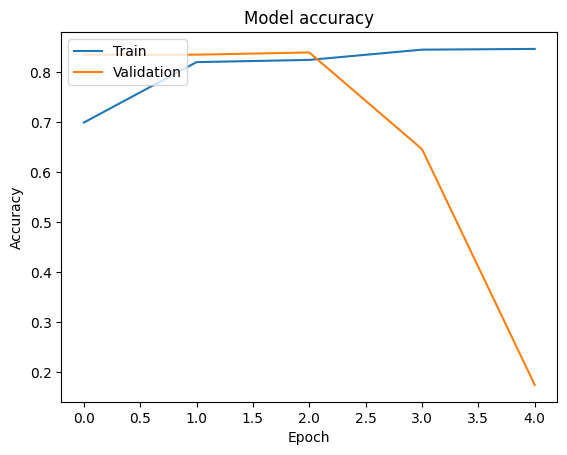

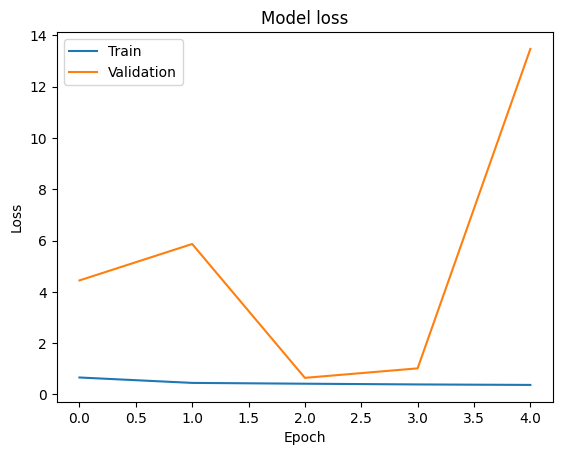

In [18]:
#Plotting 
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [26]:
BATCH_SIZE       = 32
IMG_HEIGHT_WIDTH = 256
IMG_INPUT_SHAPE  = (IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH, 3)
MAX_EPOCHS       = 30

In [27]:
train_gen=tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH),
    batch_size=BATCH_SIZE)

val_gen= tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_HEIGHT_WIDTH, IMG_HEIGHT_WIDTH),
    batch_size=BATCH_SIZE
)

Found 4200 files belonging to 2 classes.
Using 3360 files for training.
Found 4200 files belonging to 2 classes.
Using 840 files for validation.


In [19]:
#Implementing ResNet50
from keras.applications.resnet import ResNet50
resnet50=ResNet50(input_shape=(200,200,3), include_top=False, weights='imagenet')

In [20]:

for layer in resnet50.layers:
   layer.trainable=False

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.models import Model
# Reset TensorFlow graph
resnet50_model=Sequential()
tf.keras.backend.clear_session()
resnet50_model=Sequential()
resnet50_model.add(resnet50)
resnet50_model.add(Flatten())
resnet50_model.add(Dense(256,activation='relu'))
resnet50_model.add(Dense(128, activation='relu'))
resnet50_model.add(Dropout(0.5))
resnet50_model.add(Dense(2, activation='sigmoid'))

In [22]:
from tensorflow.keras.optimizers import Adam
resnet50_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Convert grayscale images to RGB format
x_train_rgb = np.repeat(x_train, 3, -1)
x_val_rgb = np.repeat(x_val, 3, -1)
x_test_rgb = np.repeat(x_test, 3, -1)

In [25]:
history1=resnet50_model.fit(train_generator ,epochs=5,validation_data=(x_val,y_val),verbose=1)


Epoch 1/5


AttributeError: 'NoneType' object has no attribute 'items'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


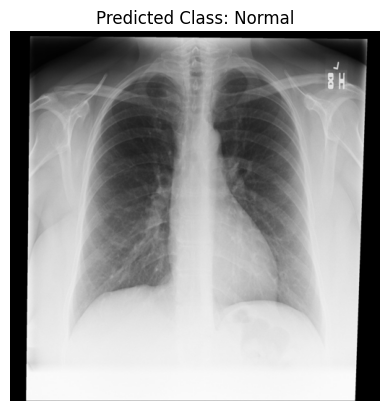

In [23]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the test dataset directory
test_path = "D:\\dataset for lab programs\\tuberculosis"

# Get a random folder from the test dataset
random_folder = random.choice(os.listdir(test_path))

# List all image files in the chosen folder
image_files = [file for file in os.listdir(os.path.join(test_path, random_folder)) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Choose a random image from the list of image files
random_image = random.choice(image_files)
random_image_path = os.path.join(test_path, random_folder, random_image)

# Read and preprocess the randomly selected image
img = cv2.imread(random_image_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
img = cv2.resize(img, (200, 200))
img = np.reshape(img, [1, 200, 200, 1])  # Reshape to match the model input shape
img = img / 255

# Make predictions on the image (Assuming the 'model' variable is defined elsewhere in your code)
preds = model.predict(img)
max_idx = np.argmax(preds)

# Define class indices
class_indices = {0: 'Normal', 1: 'Tuberculosis'}  # Update with your class indices if needed

# Get the predicted class label
predicted_class = class_indices[max_idx]

# Plot the image with the predicted class label
plt.imshow(cv2.cvtColor(cv2.imread(random_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()
